# Email Spam Preview

## importing Libraries

In [66]:
import pandas as pd # Para manusear dados tabulares
import seaborn as srn # Para gráficos estatísticos
import statistics as sts # Para cálculos matemáticos
import numpy as np # Para operações numéricas
import seaborn as sns # Para visualização de dados estatísticos
import matplotlib.pyplot as plt # Para criação de gráficos
from sklearn.preprocessing import LabelEncoder # Para codificar colunas

## Importing the Dataset

In [67]:
dataset = pd.read_csv("D:\Pablinho & Nanda\Documents\Programação\Email Spam Classification\Data\emails.csv")

In [68]:
dataset.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [69]:
dataset.tail(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [70]:
dataset.shape

(5172, 3002)

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [72]:
dataset.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


## Analising the Dataset

In [73]:
# Clonando o Dataframe
emails_data = dataset
emails_data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [74]:
# Iniciando a procura por valores nulos:
emails_data.isnull().value_counts()

Email No.  the    to     ect    and    for    of     a      you    hou    in     on     is     this   enron  i      be     that   will   have   with   your   at     we     s      are    it     by     com    as     from   gas    or     not    me     deal   if     meter  hpl    please  re     e      any    our    corp   can    d      all    has    was    know   need   an     forwarded  new    t      may    up     j      mmbtu  should  do     am     get    out    see    no     there  price  daren  but    been   company  l      these  let    so     would  m      into   xls    farmer  attached  us     information  they   message  day    time   my     one    what   only   http   th     volume  mail   contract  which  month  more   robert  sitara  about  texas  nom    energy  pec    questions  www    deals  volumes  pm     ena    now    their  file   some   email  just   also   call   change  other  here   like   b      flow   net    following  p      production  when   over   back   want   o

In [75]:
count_nulls=emails_data.isnull().sum()

In [76]:
# Apresentando colunas com nulos ( Redundante, porém para aprendizado):
col_with_nulls = count_nulls[count_nulls>=1]
col_with_nulls
# Também observa-se que os valores são todos do tipo int64

Series([], dtype: int64)

In [77]:
# Verificando no somatório total se tem algum valor nulo:
totaldenulos=emails_data.isna().sum().sum()
totaldenulos

0

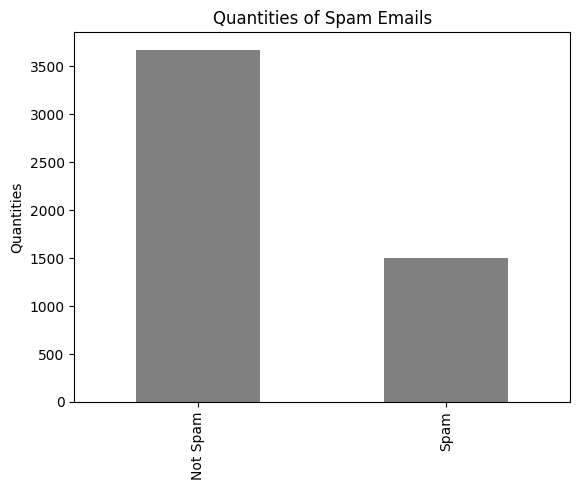

In [78]:
# Plotando gráfico da coluna Prediction:
contagem_valores = emails_data['Prediction'].value_counts()
contagem_valores.plot(kind='bar', color='gray')
plt.xlabel('')
plt.ylabel('Quantities')
plt.title('Quantities of Spam Emails')

plt.xticks([0,1],['Not Spam','Spam'])
plt.show()

## Treating the dataset

In [79]:
# Clonando o dataframa mais uma vez:
emails_data.drop(columns='Email No.',inplace=True)
emails_data


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


## Saving the cleaned dataframe as CSV file

In [81]:
emails_data.to_csv('D:\Pablinho & Nanda\Documents\Programação\Email Spam Classification\Data\Emails_cleaned.csv', index=False)